# Linear Classifiers: Support Vector Machine (SVM)

- If the output value > 0 -> =1
- If the output value < 0 -> =0

<img src="resources/svm.png" width = "600">

The same as for a linear regression:
- w -> vector of weights
- x -> vector of features
- b -> vector of bias terms

Then we feed the result of this linear model into a function that outputs a value between -1 and 1.

In our example, we can draw a line corresponding to the following function.

<img src="resources/svm_2.png" width = "600">

Then we take that function as w coefficients.

Example 1: we would classify the following value as +1:

<img src="resources/svm_3.png" width = "600">

Example 2: we would classify the following value as -1:

<img src="resources/svm_4.png" width = "600">

### Classifier Margin

One way to define a good classifier is t oreward classifiers for the aount of separation that can provide between two classes.
- The margin is the width that the decision boundary can be increased before hitting a data point.

<img src="resources/svm_5.png" width = "600">

Based on this metric, we can say that the best classifier is the classifier that has the maximum amount of margin.

### Extra notes
- C -> regularization parameter
- Larger values of C -> less regularization
    - It will try to fit as many points as possible, even if it means smaller classifier margin
- Smaller values of C -> more regularization
    - It encourages the classifier to finding a higher margin, even if it means more points being missclassfied

### For Logistic regression and SVM
<img src="resources/svm_6.png" width = "600">

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Datasets
from sklearn.datasets import make_regression, make_friedman1, make_classification, make_blobs
from sklearn.datasets import load_breast_cancer
from utils.adspy_shared_utilities import load_crime_dataset

X_R1, y_R1 = make_regression(n_samples = 100, n_features = 1, n_informative = 1, bias = 150.0, noise = 30, random_state = 0)
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7, random_state = 0)
X_C2, y_C2 = make_classification(n_samples = 100, n_features = 2, n_redundant = 0, n_informative = 2, n_clusters_per_class = 1, flip_y = .1, class_sep = .5, random_state = 0)
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8, cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2


# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset('data/CommViolPredUnnormalizedData.txt')

# Load data
fruits = pd.read_table('data/fruit_data_with_colors.txt')

### Linear Support Vector Machine

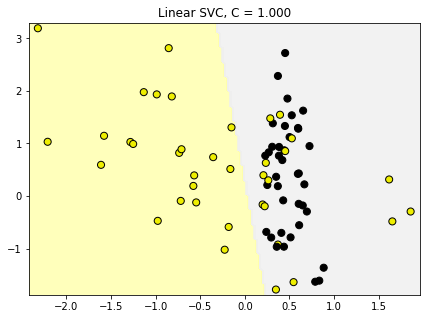

In [7]:
from utils.adspy_shared_utilities import plot_class_regions_for_classifier_subplot

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

# Matplotlib figure
fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))

# Model selection and training
this_C = 1.0
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)

# Plot
title = 'Linear SVC, C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

### Linear Support Vector Machine: C parameter

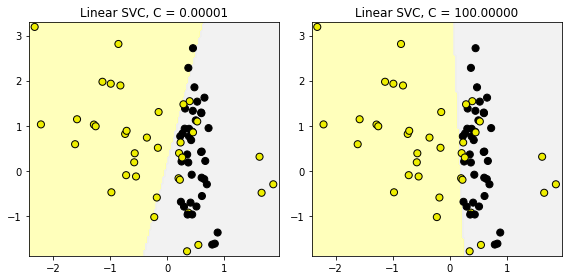

In [8]:
from sklearn.svm import LinearSVC

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

# Matplotlib figure
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

# Iterate over different Cs and axes
for this_C, subplot in zip([0.00001, 100], subaxes):
    # Model selection and training
    clf = LinearSVC(C=this_C).fit(X_train, y_train)

    # Plot
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subplot)
    
plt.tight_layout()

### Application to real dataset

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

# Model selection and training
clf = LinearSVC().fit(X_train, y_train)

# Scores
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('Breast cancer dataset')
print(f'Accuracy of Linear SVC classifier on training set: {train_score:.2f}')
print(f'Accuracy of Linear SVC classifier on test set: {test_score:.2f}')

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.92
Accuracy of Linear SVC classifier on test set: 0.94
